# This notebook is for extracting the length between emission lines in the data.

In [129]:
import numpy as np
from astropy.io import fits
from glob import glob
import matplotlib.pyplot as plt

In [130]:
fit = fits.open("../../../AstroProj/Data/RawManga/HIT_RSS_mpl5_7443_6103_fiber_346_oneline.fits")

In [131]:
fit.info()

Filename: ../../../AstroProj/Data/RawManga/HIT_RSS_mpl5_7443_6103_fiber_346_oneline.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  HITS          1 BinTableHDU     51   1R x 5C   [1J, 1E, 1E, 10E, 1E]   
  2  WAVE          1 ImageHDU        39   (4563,)   float64   
  3  FLUX          1 ImageHDU        39   (4563,)   float32   
  4  IVAR          1 ImageHDU        39   (4563,)   float32   
  5  IVAR_RESCALED    1 ImageHDU        39   (4563,)   float64   
  6  MODEL_GENERATED    1 ImageHDU        39   (4563,)   float64   
  7  RESFLUX       1 ImageHDU        39   (4563,)   float64   
  8  O2SN          1 ImageHDU        39   (4563,)   float64   
  9  EMSN          1 ImageHDU        40   (4563, 10)   float64   
 10  MASK          1 ImageHDU        39   (4563,)   int32   


In [132]:
emsn_header = fit[0].header

In [141]:
wanted_emission_lines = ['OIIB', 'OIIA', 'HID', 'HIC', 'HIB', 'OIIIB', 'OIIIA', 'NIIB', 'HIA', 'NIIA', 'SIIB', 'SIIA']
emsn_lines = list(map(lambda x: int(emsn_header[x]), wanted_emission_lines))
emsn_locations = list(map(lambda x: x- min(emsn_lines), emsn_lines))
emsn_locations_shifted = list(map(lambda x: x + 5, emsn_locations))

window_vect = np.zeros(max(emsn_locations_shifted) + 6)
for ix in emsn_locations_shifted:
    window_vect[ix-5:ix+6] = 1

In [142]:
len(window_vect)

3016

In [143]:
emsn_lines

[3727, 3729, 4102, 4341, 4862, 4960, 5008, 6549, 6564, 6585, 6718, 6732]

In [144]:
spectra.info()

Filename: ../../../AstroProj/Data/RawEboss/1011/HIT_SPEC_dr8_1011_52652_156_fiber_multiline.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      37   ()      
  1  HITS          1 BinTableHDU     51   1R x 5C   [1J, 1E, 1E, 10E, 1E]   
  2  WAVE          1 ImageHDU        39   (3840,)   float32   
  3  FLUX          1 ImageHDU        39   (3840,)   float32   
  4  IVAR          1 ImageHDU        39   (3840,)   float32   
  5  IVAR_RESCALED    1 ImageHDU        39   (3840,)   float64   
  6  MODEL_GENERATED    1 ImageHDU        39   (3840,)   float64   
  7  RESFLUX       1 ImageHDU        39   (3840,)   float64   
  8  O2SN          1 ImageHDU        39   (3840,)   float64   
  9  EMSN          1 ImageHDU        40   (3840, 10)   float64   
 10  DATA_MODEL    1 ImageHDU        39   (3840,)   float32   


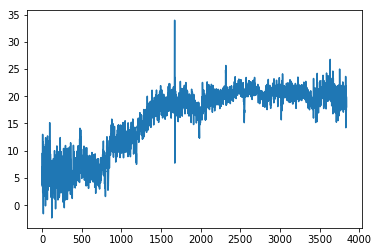

In [145]:
flux_data = spectra[3].data
plt.plot(range(len(flux_data)), flux_data)

In [146]:
spectra[3].header['NAXIS1']

3840

## Trying to convince myself that my conv window will line up correctly.

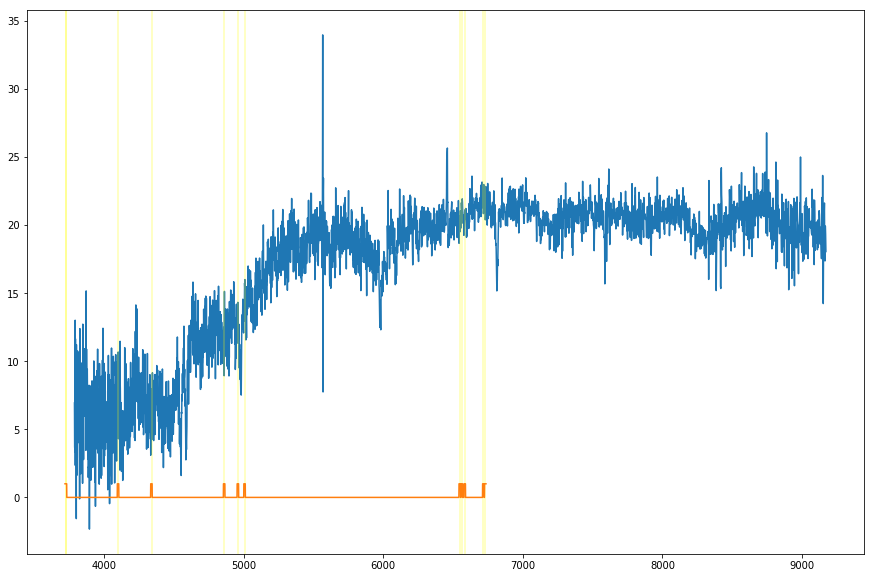

In [147]:
# Go through each file.
#spec_files = glob("../../Data/ExampleFitsData/Spectra/*.fits")
spec_files = glob("../../../AstroProj/Data/RawEboss/1011/HIT_SPEC_dr8_1011_52652_156_fiber_multiline.fits")


coeff0, coeff1 = 3.5785, 0.0001
for f in spec_files:
    spectra = fits.open(f)
    
    # How to calculate where to start the x-variable on.
    naxis = spectra[3].header['NAXIS1']
    #coeff0, coeff1 = spectra[0].header['COEFF0'], spectra[0].header['COEFF1']
    #names, values = spectra[3].data['LINENAME'], spectra[3].data['LINEWAVE']
    flux_data = spectra[3].data

    # Calculating the x-range.
    wave_range = 10**(coeff0 + (coeff1*np.arange(naxis)))

    # Plot the flux.
    plt.figure(figsize=(15,10))
    #plt.title(str(spectra[2].data['BOSS_SPECOBJ_ID']) + ": " +  str(spectra[2].data['CLASS']))
    plt.plot(wave_range, flux_data)

    #dec_value = (np.max(flux_data) - np.min(flux_data))/len(wanted_emission_lines)
    for emsn, name in zip(emsn_lines, wanted_emission_lines):
        plt.axvline(emsn, c='yellow', alpha=.3)
    #    plt.axvline(val, c='yellow', alpha=.3)
    #    plt.text(val+1, 25, name.split(' ')[0])
    offset=500 + 150 + 55
    plt.plot(range(len(window_vect)+offset, len(window_vect) + len(window_vect)+offset), window_vect)
    # Plotting the emission lines.
    #dec_value = (np.max(flux_data) - np.min(flux_data))/len(names)
    #for ix, (name, value) in enumerate(zip(names, values)):
    #    what = plt.axvline(value, c='yellow', alpha=.3)
    #    plt.text(value+1, np.max(flux_data) - (ix*dec_value), name.split(' ')[0])